In [56]:
import scipy.io
import os 
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import numpy as np
import random 

In [50]:
DATA_DIR = "../dataset_simulated"

In [51]:
file_list = os.listdir(DATA_DIR)

In [52]:
len(file_list)

1540

In [53]:

for j, file in enumerate(file_list):
    mat_contents = scipy.io.loadmat(f'{DATA_DIR}/{file}')
    #print(mat_contents)
    reconstructed_data = mat_contents["volume7"] 
    ground_truth = mat_contents["real_recon"] 
    data_forsave = mat_contents["data_forsave"]

    target_depth = mat_contents["rtg1"][0][2]
    print(target_depth) 
    

    real_mes = data_forsave[:126,0] 
    imag_mes = data_forsave[:126,1]


    mes = np.concatenate([real_mes, imag_mes], axis = 0) 
    #print(data_forsave.shape)
    print(mes.shape)

    # for i in range(7):
    #     plt.subplot(1, 7, i+1)
    #     #print(ground_truth[:,16:-16,i].shape)
    #     plt.imshow(ground_truth[:,16:-16,i], cmap= "gray", vmin = 0, vmax = 0.2)
    # plt.show() 

    # print("====================================================================================")
    # for i in range(7):
    #     plt.subplot(1, 7, i+1)
    #     x =zoom(reconstructed_data[:,:,i], (1, 0.5))
    #     plt.imshow(x, cmap= "jet", vmin = 0, vmax = 0.2)
    # plt.show()
    if j== 3: 
        break 
    #break 

1.5
(252,)
1.5
(252,)
1.5
(252,)
1.5
(252,)


In [54]:
print(mat_contents['radius1'])


[[4.5  4.5  0.49]]


In [55]:
print(mat_contents['radius2'])

[[4.5  4.5  0.49]]


In [48]:
print(mat_contents['data_forsave'])

[[-9.99389339e-01 -2.41301971e-03  6.51668819e+00]
 [-9.91398077e-01 -1.05091557e-02  5.71809033e+00]
 [-9.66599596e-01 -2.29215328e-02  4.79102588e+00]
 ...
 [-9.99067553e-01 -2.76383940e-03  6.65896516e+00]
 [-1.00005276e+00 -5.02937650e-04  5.89249014e+00]
 [-1.00001936e+00 -6.08661582e-04  6.23301404e+00]]


In [45]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data_forsave', 'mask', 'mua0', 'mus0', 'radius1', 'radius2', 'real_recon', 'rtg1', 'rtg2', 'ua1', 'ua2', 'volume7', 'weight_matrix'])

In [19]:
ground_truth_new = ground_truth[:-1,16:-17,:]

In [20]:
ground_truth_new.shape

(32, 32, 7)

In [21]:
reconstructed_data_new = zoom(reconstructed_data[:-1,:], (1, 0.5, 1)) 

In [22]:
reconstructed_data_new.shape

(32, 32, 7)

NameError: name 'ground_truth_new' is not defined

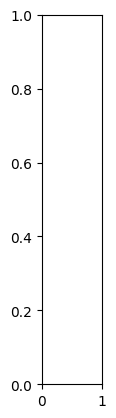

In [8]:
for i in range(7):
    plt.subplot(1, 7, i+1)
    #print(ground_truth[:,16:-16,i].shape)
    plt.imshow(ground_truth_new[:,:,i], cmap= "gray", vmin = 0, vmax = 0.2)
plt.show() 

for i in range(7):
    plt.subplot(1, 7, i+1)
    #print(ground_truth[:,16:-16,i].shape)
    plt.imshow(reconstructed_data_new[:,:,i], cmap= "gray", vmin = 0, vmax = 0.2)
plt.show() 

In [60]:
random_number = random.uniform(2, 2.5)
print("Random number between 2 and 3:", random_number)

Random number between 2 and 3: 2.7436417605018986


In [74]:
X = [] 
Y = [] 
X_mes = []
fine_meshes = []
Target_depth = [] 


def insert_sphere(array, depth, radius, mua = 1):
    z_range = np.linspace(0.5, 3.5, array.shape[0])
    x_range = np.linspace(-4, 4, array.shape[1])
    y_range = np.linspace(-4, 4, array.shape[2])
    
    # Get the index of the depth in the z-axis
    #z_index = np.abs(z_range - depth).argmin()
    
    # Get the center index of the array
    # center_x = array.shape[1] // 2
    # center_y = array.shape[2] // 2
    # center_z = z_index
    
    for i in range(array.shape[1]):
        for j in range(array.shape[2]):
            for k in range(array.shape[0]):
                # Calculate distance from the center
                distance = np.sqrt((x_range[i] - 0) ** 2 + (y_range[j] - 0) ** 2 + (z_range[k] - depth) ** 2)
                if distance <= radius:
                    array[k, i, j] = 1.0  # or any other value you choose for the sphere
                
    return array


for j, file in enumerate(file_list):
    mat_contents = scipy.io.loadmat(f'{DATA_DIR}/{file}')
    #print(mat_contents)
    reconstructed_data = mat_contents["volume7"] 
    ground_truth = mat_contents["real_recon"]
    data_forsave = mat_contents["data_forsave"]
    target_depth = mat_contents["rtg1"][0][2]
    target_radius = mat_contents["radius1"][0][2] 



    array = np.zeros((7, 32, 32))
    fine_mesh = insert_sphere(array, target_depth, target_radius*random.uniform(1.5, 2.5))



    real_mes = data_forsave[:126,0].reshape(9, 14)  
    imag_mes = data_forsave[:126,1].reshape(9, 14) 

    mes = np.concatenate([real_mes, imag_mes], axis = 0)

    ground_truth_new = ground_truth[:-1,16:-17,:]

    reconstructed_data_new = zoom(reconstructed_data[:-1,:], (1, 0.5, 1)) 

    X.append(ground_truth_new.transpose((2,0,1))) 
    Y.append(reconstructed_data_new) 
    X_mes.append(mes)
    Target_depth.append(target_depth)
    fine_meshes.append(fine_mesh) 

In [75]:
Y[0].shape

(32, 32, 7)

In [76]:
X_mes[0].shape

(18, 14)

In [77]:
X[0].shape

(7, 32, 32)

In [78]:
X_ground = np.array(X) 

In [79]:
X_ground[100].max()

0.14

In [80]:
fine_meshes = np.array(fine_meshes)

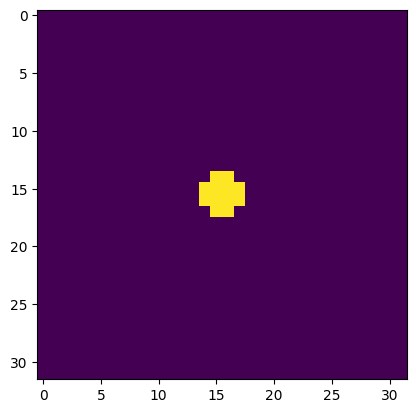

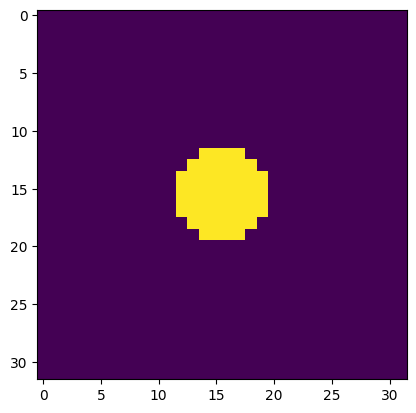

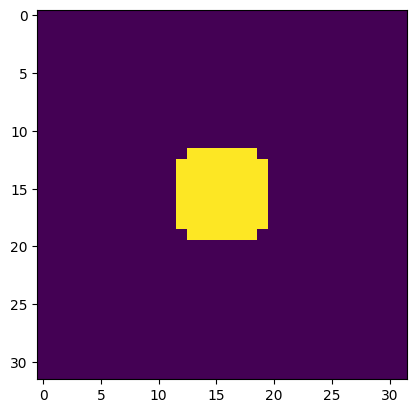

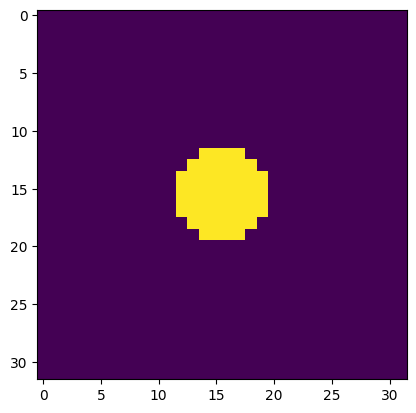

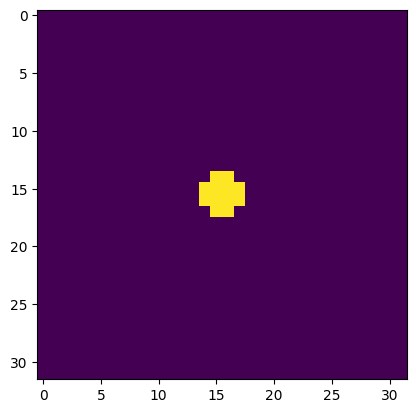

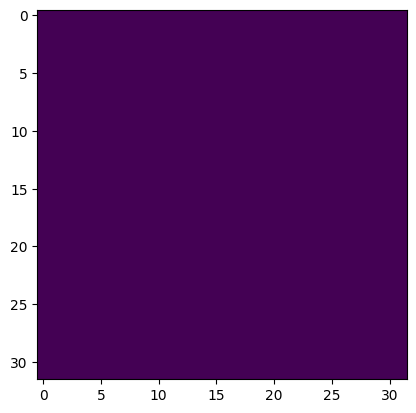

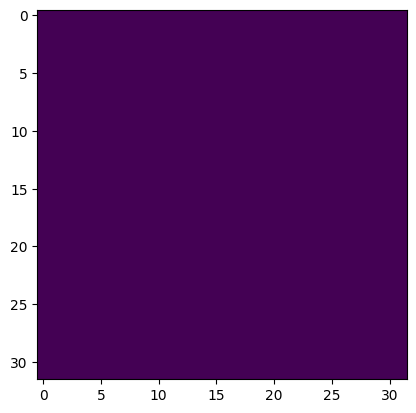

In [81]:
for i in range(7):
    plt.imshow(fine_meshes[0][i,:,:])
    plt.show()

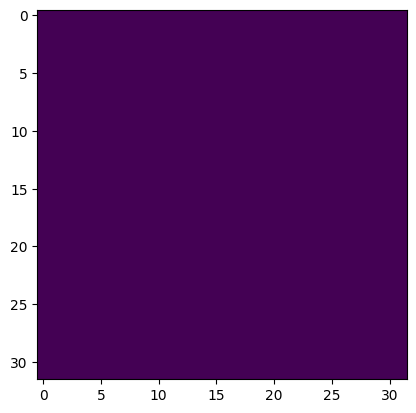

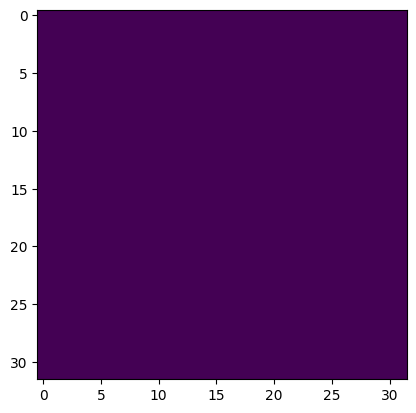

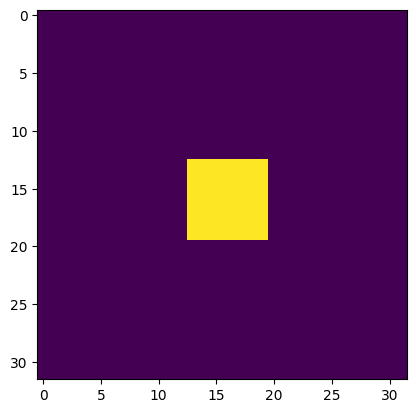

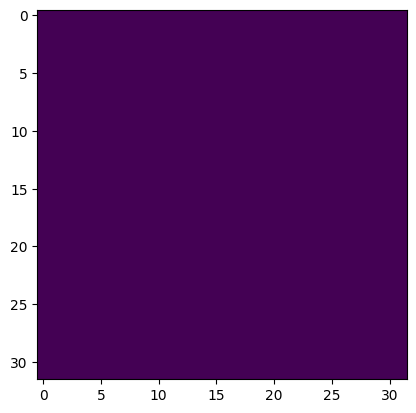

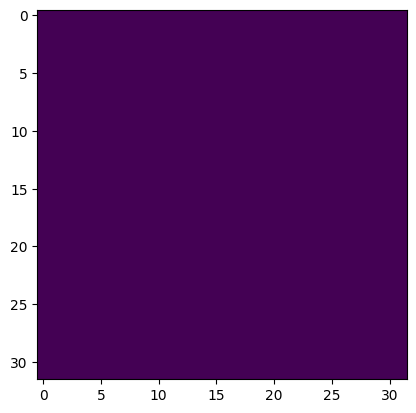

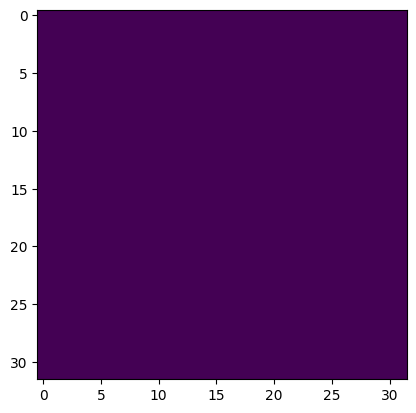

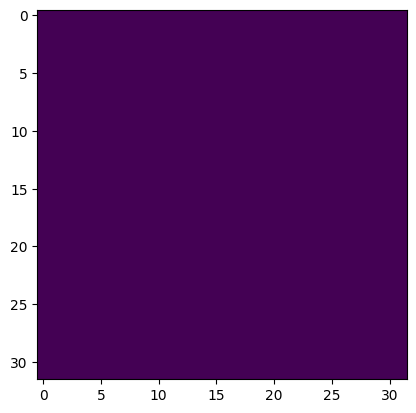

In [82]:
for i in range(7):
    plt.imshow(X_ground[0][i,:,:])
    plt.show()

In [83]:
Y_recons = np.array(Y) 

In [84]:
X_mes = np.array(X_mes) 

In [85]:
Target_depth = np.array(Target_depth) 

In [86]:
Target_depth.shape

(1540,)

In [87]:
X_mes.shape

(1540, 18, 14)

In [88]:
with open("X_ground.npy", "wb") as f: 
    np.save(f, X_ground)

In [89]:
with open("Y_recons.npy", "wb") as f: 
    np.save(f, Y_recons)

In [90]:
with open("X_mes.npy", "wb") as f: 
    np.save(f, X_mes)

In [91]:
with open("fine_meshes.npy", "wb") as f: 
    np.save(f, fine_meshes)